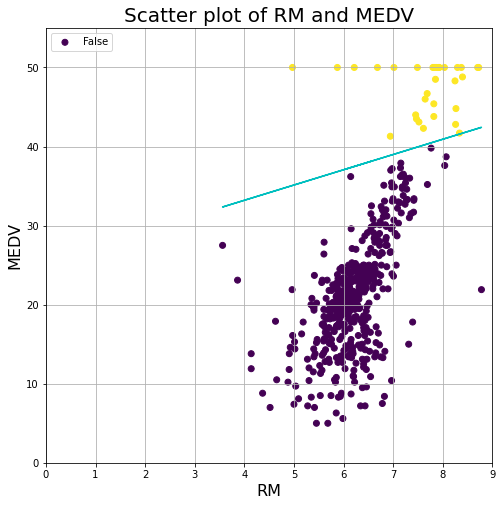

In [376]:
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(data['RM'], data['MEDV'], c = data['HighPriced'])
plt.xlabel('RM', fontsize=16)
plt.ylabel('MEDV', fontsize=16)
plt.title('Scatter plot of RM and MEDV', fontsize = 20)
plt.ylim(0., 55.0)
plt.xlim(0., 9.0)
plt.legend(data['HighPriced'],loc='upper left')
plt.plot(data['RM'], -1*weights[0]/weights[2] - (weights[1]/weights[2])*data['RM'] ,'-c', label='Separation line')
plt.grid()
plt.show()

The separation line draw from the results of iteration has a positive slope, pointing up to the upper right corner. 
This line successfully separate purple dots and yellow dots (representing highpriced observations).

But if we are to draw a separation line manually without iterations, we probably will come up with a horizontal line since the yellow dots are above 40 in the y axis.

###  Create a training/test split for the entirety of the original Boston housing dataset.


In [9]:
# construct the dataframe 
x = pd.DataFrame(boston.data)
x.columns = boston.feature_names
y=pd.DataFrame(boston.target)
y.columns=['MEDV']
data2 = pd.concat([x,y], axis=1)
# check the columns of data2
data2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [10]:
# prepare the inputs into train_test_split
y2 = data2['MEDV']
x2 = data2.iloc[:,0:13]

In [11]:
# import packages
from sklearn.model_selection import train_test_split
# separate into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x2, y2,test_size = 0.2, random_state = 1)

In [12]:
x_train.shape

(404, 13)

In [13]:
y_train.shape

(404,)

The training data set has 404 rows and 14 columns (including the target feature/MDEV)

In [14]:
x_test.shape

(102, 13)

In [15]:
y_test.shape

(102,)

The test data set has 102 rows and 14 columns (including the target feature/MDEV)

In [16]:
# import packages
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

In [157]:
layer_size = [2, 5, 10, 20, 50]

In [153]:
training_error = []
test_error = []

for size in layer_size:
    nNet = MLPRegressor(hidden_layer_sizes=(size,), max_iter = 1000)
    nNet.fit(x_train, y_train)
    predsTrain = nNet.predict(x_train)
    error = np.sqrt(mean_squared_error(y_train, predsTrain))
    training_error.append(error)
    predsTest = nNet.predict(x_test)
    error = np.sqrt(mean_squared_error(y_test, predsTest))
    test_error.append(error)

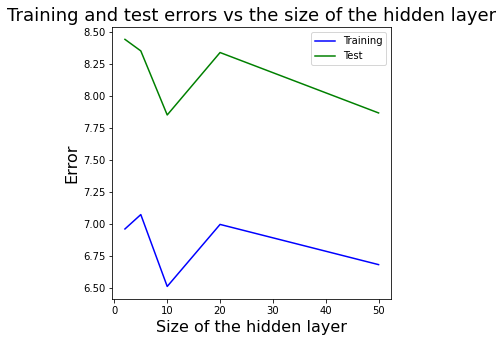

In [156]:
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(layer_size, training_error, c = 'b',label="Training")
plt.plot(layer_size, test_error, c = 'g',label="Test")
plt.xlabel('Size of the hidden layer', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.legend(loc="upper right")
plt.title('Training and test errors vs the size of the hidden layer', fontsize = 18)
plt.show()

The neural network with 10 neurons performs the best since it has the smallest trainig error.
Other neural networks have larger training error.

The neural network with 10 neurons performs the best since it has the smallest test error.
Other neural networks have larger test error.

In [158]:
layer_size = [2, 5, 10, 20, 50]

In [159]:
training_error = []
test_error = []

for size in layer_size:
    nNet = MLPRegressor(hidden_layer_sizes=(size,size,), max_iter = 1000)
    nNet.fit(x_train, y_train)
    predsTrain = nNet.predict(x_train)
    error = np.sqrt(mean_squared_error(y_train, predsTrain))
    training_error.append(error)
    predsTest = nNet.predict(x_test)
    error = np.sqrt(mean_squared_error(y_test, predsTest))
    test_error.append(error)

/Users/zhaoshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


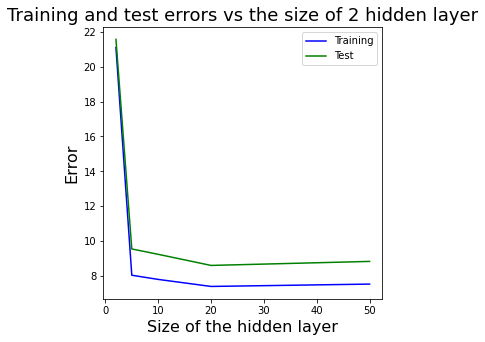

In [161]:
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(layer_size, training_error, c = 'b',label="Training")
plt.plot(layer_size, test_error, c = 'g',label="Test")
plt.xlabel('Size of the hidden layer', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.legend(loc="upper right")
plt.title('Training and test errors vs the size of 2 hidden layer', fontsize = 18)
plt.show()

The neural network with (20, 20) neurons perform the best for the training dataset.\
The neural networks with (2,2) neurons has a very high training error. \
Other neural networks with (5,5), (10,10) and (50,50) neurons have higher training errors than that of (20, 20).

The neural network with (20, 20) neurons perform the best for the test dataset.\
The neural networks with (2,2) neurons has a very high test error.
Other neural networks with (5,5), (10,10) and (50,50) neurons have higher test errors than that of (20, 20).

### Thought process:
(1) Plot the loss vs epochs of 1,2,3 hidden layers with different number of neurons.\
(2) Select the architecture which has the smallest loss.

*See detailed process and plots below.*

### Results:
By comparing the loss of varied architectures, the architecture of (30, 30) neurons across 2 hidden layers performs the best with the smallest loss around 100.

### Comparison with networks in Q14 & Q15
The architecture of (30, 30) neurons across 2 hidden layers performs the best since it has the smallest loss.\
See the last plot.

### Experiment with single hidden layer

In [93]:
# a single hidden layer with 10 neurons
nNet = MLPRegressor(hidden_layer_sizes=(10,), max_iter = 20)
nNet.fit(x_train, y_train)
epoch_count = range(1, len(nNet.loss_curve_) + 1)

/Users/zhaoshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [94]:
# 20 neurons
nNet2 = MLPRegressor(hidden_layer_sizes=(20,), max_iter = 20)
nNet2.fit(x_train, y_train)
epoch_count2 = range(1, len(nNet2.loss_curve_) + 1)

/Users/zhaoshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [95]:
# 30 neurons
nNet3 = MLPRegressor(hidden_layer_sizes=(30,), max_iter = 20)
nNet3.fit(x_train, y_train)
epoch_count3 = range(1, len(nNet3.loss_curve_) + 1)

/Users/zhaoshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [96]:
# 5 neurons
nNet10 = MLPRegressor(hidden_layer_sizes=(5,), max_iter = 20)
nNet10.fit(x_train, y_train)
epoch_count10 = range(1, len(nNet10.loss_curve_) + 1)

/Users/zhaoshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


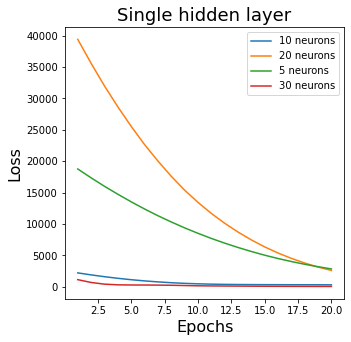

In [128]:
# Plot loss vs epochs
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(epoch_count, nNet.loss_curve_, label = '10 neurons')
plt.plot(epoch_count2, nNet2.loss_curve_, label = '20 neurons')
plt.plot(epoch_count10, nNet10.loss_curve_, label = '5 neurons')
plt.plot(epoch_count3, nNet3.loss_curve_, label = '30 neurons')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc="upper right")
plt.title('Single hidden layer', fontsize = 18)
plt.show()

### For single hidden layer neural networks, the loss is around 2,500.

### Experiment with 2 hidden layers

In [101]:
# 2 hidden layers with (10, 10) neurons
nNet4 = MLPRegressor(hidden_layer_sizes=(10,10), max_iter = 20)
nNet4.fit(x_train, y_train)
epoch_count4 = range(1, len(nNet4.loss_curve_) + 1)

/Users/zhaoshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [102]:
# 2 hidden layers with (20, 20) neurons
nNet5 = MLPRegressor(hidden_layer_sizes=(20,20), max_iter = 20)
nNet5.fit(x_train, y_train)
epoch_count5 = range(1, len(nNet5.loss_curve_) + 1)

/Users/zhaoshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [103]:
# 2 hidden layers with (30, 30) neurons
nNet6 = MLPRegressor(hidden_layer_sizes=(30,30), max_iter = 20)
nNet6.fit(x_train, y_train)
epoch_count6 = range(1, len(nNet6.loss_curve_) + 1)

/Users/zhaoshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [104]:
# 2 hidden layers with (5, 5) neurons
nNet11 = MLPRegressor(hidden_layer_sizes=(5,5), max_iter = 20)
nNet11.fit(x_train, y_train)
epoch_count11 = range(1, len(nNet11.loss_curve_) + 1)

/Users/zhaoshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


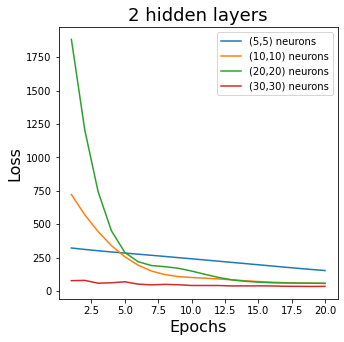

In [130]:
# Plot
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(epoch_count11, nNet11.loss_curve_, label = '(5,5) neurons')
plt.plot(epoch_count4, nNet4.loss_curve_, label = '(10,10) neurons')
plt.plot(epoch_count5, nNet5.loss_curve_, label = '(20,20) neurons')
plt.plot(epoch_count6, nNet6.loss_curve_, label = '(30,30) neurons')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc="upper right")
plt.title('2 hidden layers', fontsize = 18)
plt.show()

### For 2 hidden layers neural networks, the architecture of (30, 30) neurons has the smallest loss of ~100.

### Experiment with 3 hidden layers

In [77]:
# 3 hidden layers with (10, 10) neurons
nNet7 = MLPRegressor(hidden_layer_sizes=(10,10), max_iter = 20)
nNet7.fit(x_train, y_train)
epoch_count7 = range(1, len(nNet7.loss_curve_) + 1)

/Users/zhaoshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [107]:
# 3 hidden layers with (20, 20) neurons
nNet8 = MLPRegressor(hidden_layer_sizes=(20,20), max_iter = 20)
nNet8.fit(x_train, y_train)
epoch_count8 = range(1, len(nNet8.loss_curve_) + 1)

/Users/zhaoshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [109]:
# 3 hidden layers with (30, 30) neurons
nNet9 = MLPRegressor(hidden_layer_sizes=(30,30), max_iter = 20)
nNet9.fit(x_train, y_train)
epoch_count9 = range(1, len(nNet9.loss_curve_) + 1)

/Users/zhaoshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [111]:
# 3 hidden layers with (5, 5) neurons
nNet12 = MLPRegressor(hidden_layer_sizes=(5,5), max_iter = 20)
nNet12.fit(x_train, y_train)

/Users/zhaoshuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(5, 5), max_iter=20)

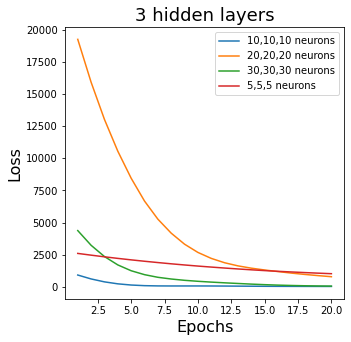

In [131]:
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(epoch_count7, nNet7.loss_curve_, label = '10,10,10 neurons')
plt.plot(epoch_count8, nNet8.loss_curve_, label = '20,20,20 neurons')
plt.plot(epoch_count9, nNet9.loss_curve_, label = '30,30,30 neurons')
plt.plot(epoch_count9, nNet12.loss_curve_, label = '5,5,5 neurons')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc="upper right")
plt.title('3 hidden layers', fontsize = 18)
plt.show()

### For 3 hidden layers neural networks, the architecture of (10, 10,10) neurons has the smallest loss of ~300.

### Compare performence with models from question 15 &16

In [142]:
# Question 15, choose the network with a single hidden layer with 10 neurons (performs the best in Q15)
# Question 16, choose the network with 2 hidden layers with 20, 20 neurons (performs the best in Q16)
# Newly built in question 17, the network with 2 hidden layers with 30, 30 neurons

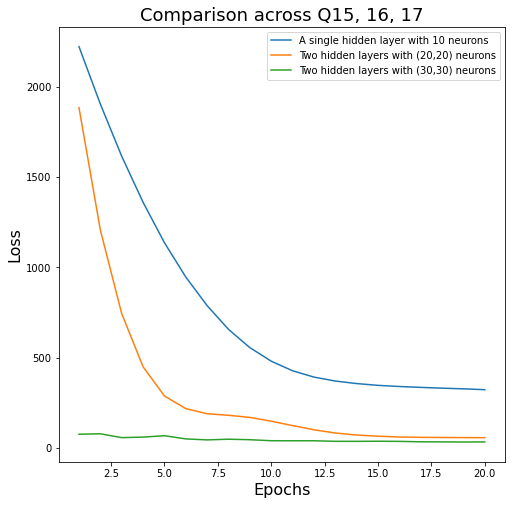

In [144]:
# Plot
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(epoch_count, nNet.loss_curve_, label = 'A single hidden layer with 10 neurons')
plt.plot(epoch_count5, nNet5.loss_curve_, label = 'Two hidden layers with (20,20) neurons')
plt.plot(epoch_count6, nNet6.loss_curve_, label = 'Two hidden layers with (30,30) neurons')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc="upper right")
plt.title('Comparison across Q15, 16, 17', fontsize = 18)
plt.show()

The plot shows that the network with 2 hidden layers and (30,30) neurons performs the best.